# multiSTAT Homework 2

> $$\text{Abstract}$$
> This notebook is created to mark my solutions and proofs down.   
> 
> The exercises here are from the **chapter 5&6** of the book *"Applied Multivariate Statistical Analysis"* by *Richard A. Johnson*.  
> 
> Both *Python* and *R* are used to solve the problems.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

 ## 5.4
 > Use the sweat data in Table 5.1.(See Example 5.2.)
 > - (a)Determine the axes of the 90% confidence ellipsoid for $\mu$. Determine the lengths of these axes.
 > 
 > - (b)Construct Q–Q plots for the observations on sweat rate, sodium content, and potassium content,respectively. Construct the three possible scatter plots for pairs ofobservations.Does the multivariate normal assumption seem justified in this case? Comment.

In [3]:
path = 'D:\A-多元统计分析\Wichern_data\Wichern_data\T5-1.DAT'
data = pd.read_csv(path, sep='\s+', header=None)

In [4]:
data = np.array(data).T

In [5]:
data

array([[ 3.7,  5.7,  3.8,  3.2,  3.1,  4.6,  2.4,  7.2,  6.7,  5.4,  3.9,
         4.5,  3.5,  4.5,  1.5,  8.5,  4.5,  6.5,  4.1,  5.5],
       [48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9,
        58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9],
       [ 9.3,  8. , 10.9, 12. ,  9.7,  7.9, 14. ,  7.6,  8.5, 11.3, 12.7,
        12.3,  9.8,  8.4, 10.1,  7.1,  8.2, 10.9, 11.2,  9.4]])

In [6]:
p,n = data.shape
N = p*n

In [7]:
p,n,N

(3, 20, 60)

### (a)

> Determine the axes of the 90% confidence ellipsoid for $\mu$. Determine the lengths of these axes.

$(Solution).$

The confidence ellipsoid is determined by:
$$
n(\bar{x}-\mu)^TS^{-1}(\bar{x}-\mu) \leq \frac{p(n-1)}{n-p}F_{p,n-p}(\alpha)
$$
or:
$$
(\bar{x}-\mu)^TS^{-1}(\bar{x}-\mu) \leq \frac{p(n-1)}{n(n-p)}F_{p,n-p}(\alpha)
$$

In [8]:
bar_X = data.mean(axis=1)

In [9]:
bar_X

array([ 4.64 , 45.4  ,  9.965])

In [10]:
S = np.cov(data)
S

array([[  2.87936842,  10.01      ,  -1.80905263],
       [ 10.01      , 199.78842105,  -5.64      ],
       [ -1.80905263,  -5.64      ,   3.62765789]])

Here, we get the directions of axes through eigenvectors of $S^{-1}$.

In [11]:
eig_val, eig_vec = np.linalg.eig(S)

In [12]:
eig_vec

array([[-0.05084144, -0.81748351, -0.57370364],
       [-0.99828352,  0.02487655,  0.05302042],
       [ 0.02907156, -0.57541452,  0.81734508]])

In [13]:
alpha = 1- 0.9

c_square = p*(n-1)/n/(n-p) * stats.f.ppf(alpha, p, n-p)
c = np.sqrt(c_square)

In [14]:
axe_directions = eig_vec
axe_lengths = np.power(eig_val, 1/2) * c

In [15]:
print(f'Axes directions are {axe_directions}, and their lengths are {axe_lengths}')

Axes directions are [[-0.05084144 -0.81748351 -0.57370364]
 [-0.99828352  0.02487655  0.05302042]
 [ 0.02907156 -0.57541452  0.81734508]], and their lengths are [2.54394846 0.20497264 0.38248738]


Axes **directions** are 
- [ 0.81748351 -0.57370364  0.05084144]
- [-0.02487655  0.05302042  0.99828352]
- [ 0.57541452  0.81734508 -0.02907156]  

 and their **lengths** are respectively 0.15750257, 0.08440466, 0.0126904

### (b)
> Construct Q–Q plots for the observations on sweat rate, sodium content, and potassium content, **respectively**. 
> 
> Construct the three possible scatter plots for pairs of observations. 
> 
> Does the multivariate normal assumption seem justified in this case? Comment.

#### Q-Q plots for three

In [16]:
data

array([[ 3.7,  5.7,  3.8,  3.2,  3.1,  4.6,  2.4,  7.2,  6.7,  5.4,  3.9,
         4.5,  3.5,  4.5,  1.5,  8.5,  4.5,  6.5,  4.1,  5.5],
       [48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9,
        58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9],
       [ 9.3,  8. , 10.9, 12. ,  9.7,  7.9, 14. ,  7.6,  8.5, 11.3, 12.7,
        12.3,  9.8,  8.4, 10.1,  7.1,  8.2, 10.9, 11.2,  9.4]])

In [17]:
variable_names = 'sweat rate sodium content and potassium content'.strip().split()

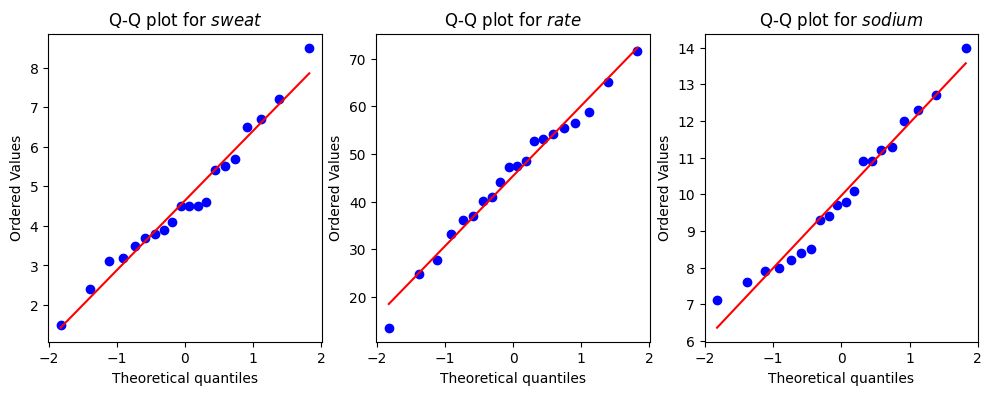

In [18]:
plt.style.use('default')
fig = plt.figure(figsize=(12, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    stats.probplot(data[i], dist='norm', plot=ax)
    ax.set_title(f'Q-Q plot for ${variable_names[i]}$')

#### three possible scatter plots for **pairs** of observations

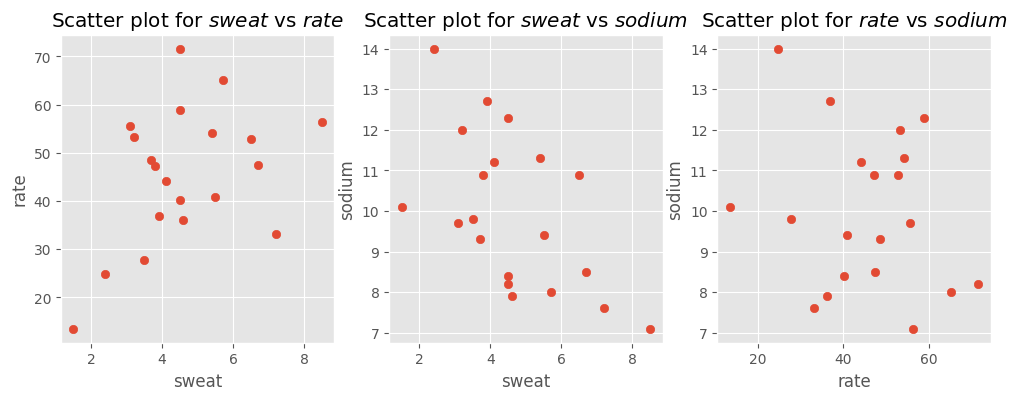

In [19]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(12, 4))

for i in range(3):
    for j in range(i+1, 3):
        ax = fig.add_subplot(1, 3, i+j)
        ax.scatter(data[i], data[j])
        ax.set_title(f'Scatter plot for ${variable_names[i]}$ vs ${variable_names[j]}$')
        ax.set_xlabel(variable_names[i])
        ax.set_ylabel(variable_names[j])


#### Analysis

According to the **Q-Q plots**, the data for sweat rate, sodium content, and potassium content, **as individuals**, respectively distribute normally. But that's an one-dimensional analysis. 

When we look at the **scatter plots**, the data for sweat rate, sodium content, and potassium content, **as pairs**, basically distribute normally, for we can find that they are around some kind of centre without containing any obvious unusual pattern. 

Therefore, the multivariate normal assumption seems justified in this case.

## 5.6

> Verify the Bonferroni inequality in (5-28) for m = 3.
> - **Hint**: A Venn diagram for the three events and may help.

$\text{(Proof).}$

The inequality is :
$$
P[\text{all }C_i\text{ true}] = 1 - P[\text{at least one }C_i \space false]
$$ 
$$
\geq 1 - \sum_{i=1}^m P[C_i\space false]= 1 - \sum_{i=1}^m (1 - P(C_i \space true)) 
$$
$$
= 1 - (\alpha_1 +\alpha_2+ \dots +\alpha_m)
$$

似乎有一个Python Package, **matplotlib_venn**, 能够画出Venn diagram(维恩图).

In [20]:
# 导入维恩图包
from matplotlib_venn import venn3, venn3_circles 

venn3是画图函数，venn3_circles是用于修改参数

In [21]:
# 生成随机数
import random

np.random.seed(0)
group1 = np.random.randint(1, 15, 10)

np.random.seed(1)
group2 = np.random.randint(1, 15, 10)

np.random.seed(2)
group3 = np.random.randint(1, 15, 10)

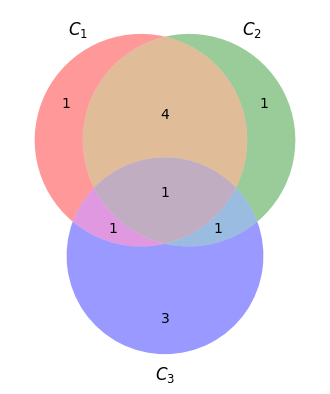

In [22]:
plt.style.use('ggplot')

set1 = set(group1)
set2 = set(group2)
set3 = set(group3)

# 利用venn3快速创建3组-输入集合
v= venn3(subsets = [set1, set2, set3], set_labels = ('$C_1$', '$C_2$', '$C_3$'))

#### Complete Proof of It:

We want to prove that for any finite collection of events \( A_1, A_2, \ldots, A_n \), the following inequality holds:

$$
P\left(\bigcup_{i=1}^n A_i\right) \leq \sum_{i=1}^n P(A_i)
$$

##### Step 1: Base Case (n = 2)

For two events \( A_1 \) and \( A_2 \), we use the principle of inclusion-exclusion:

$$
P(A_1 \cup A_2) = P(A_1) + P(A_2) - P(A_1 \cap A_2)
$$

Since probabilities are non-negative, \( P(A_1 \cap A_2) \geq 0 \), thus:

$$
P(A_1 \cup A_2) \leq P(A_1) + P(A_2)
$$

This establishes the base case.

##### Step 2: Inductive Step

Assume the inequality holds for \( n = k \), i.e.,

$$
P\left(\bigcup_{i=1}^k A_i\right) \leq \sum_{i=1}^k P(A_i)
$$

We need to show it holds for \( n = k + 1 \).

Consider $( A_1, A_2, \dots, A_k, A_{k+1} )$. We can write:

$$
P\left(\bigcup_{i=1}^{k+1} A_i\right) = P\left(\left(\bigcup_{i=1}^k A_i\right) \cup A_{k+1}\right)
$$

Using the principle of inclusion-exclusion for this union:

$$
P\left(\left(\bigcup_{i=1}^k A_i\right) \cup A_{k+1}\right) = P\left(\bigcup_{i=1}^k A_i\right) + P(A_{k+1}) - P\left(\left(\bigcup_{i=1}^k A_i\right) \cap A_{k+1}\right)
$$

By the inductive hypothesis:

$$
P\left(\bigcup_{i=1}^k A_i\right) \leq \sum_{i=1}^k P(A_i)
$$

Also, since \( \left(\bigcup_{i=1}^k A_i\right) \cap A_{k+1} \subseteq \bigcup_{i=1}^k A_i \), we have:

$$
P\left(\left(\bigcup_{i=1}^k A_i\right) \cap A_{k+1}\right) \leq P\left(\bigcup_{i=1}^k A_i\right)
$$

Thus:

$$
P\left(\left(\bigcup_{i=1}^k A_i\right) \cup A_{k+1}\right) \leq \sum_{i=1}^k P(A_i) + P(A_{k+1}) - P\left(\bigcup_{i=1}^k A_i\right)
$$

Since $( P\left(\bigcup_{i=1}^k A_i\right) \geq 0 )$:

$$
P\left(\bigcup_{i=1}^{k+1} A_i\right) \leq \sum_{i=1}^k P(A_i) + P(A_{k+1})
$$

$$
P\left(\bigcup_{i=1}^{k+1} A_i\right) \leq \sum_{i=1}^{k+1} P(A_i)
$$

This completes the inductive step.

##### Conclusion

By mathematical induction, we have shown that for any finite collection of events \( A_1, A_2, \ldots, A_n \):

$$
P\left(\bigcup_{i=1}^n A_i\right) \leq \sum_{i=1}^n P(A_i)
$$

## 5.15
> Let $X_{ji}$ and $X_{jk}$ be the $ith$ and $kth$ components, respectively, of $X_j$.
> - (a) Show that $\mu_i\space and\space E(X_{ji})=p_i$ and $\sigma_{ii}=Var(X_{ji})=p_i(1-p_i),i=1,2,...,p$.
> 
> - (b) Show that $\sigma_{ik} = Cov(X_{ji}, X_{jk}) = -p_ip_k$. Why must this covariance necessarily be negative?
>
> $(Proof)$.

 ### (a)

 $E(X_{ij})=1 \times p_i + 0 \times (1-p_i)=p_i$ <br>
 $Var(X_{ij})=E(X_{ij}^2)-[E(X_{ij})]^2=p_i-p_i^2=p_i(1-p_i)$

### (b)

$Cov(X_{ji},X_{jk}) = E(X_{ji}X_{jk})-E(X_{ji})E(X_{jk})$
$= 0 - p_ip_k = -p_ip_k$

## 5.16
> As part of a larger marketing research project, a consultant for the Bank of Shorewood wants to know the proportion of savers that uses the bank’s facilities as their primary vehicle for saving. The consultant would also like to know the proportions of savers who use the three major competitors: Bank B, Bank C, and Bank D. Each individual contacted in a survey responded to the following question:
>

<img src="D:/A-多元统计分析/Homeworks/5.16.png" width="40%">

### (a)

Obviously the interval is given by:
$$
\hat{p}_j \pm \sqrt{x_4^2(0.05)}\sqrt{\hat{p}_j(1-\hat{p}_j)/n}
$$
So the confidence interval, respectively is:
 (0.221, 0.370), (0.258, 0.412), (0.098, 0.217), (0.029, 0.112), (0.084, 0.198)

### (b)
> Construct a simultaneous **95% confidence interval** that allows a comparison of the Bank of Shorewood with its major competitor, Bank B. 
> 
> Interpret this interval.

We set $a = (1,-1,0,0,0)^T$, $a^T\mu$'s 1-$\alpha$ confidence interval is:
$$
a^T\bar{X} \pm \sqrt{x_4^2(\alpha)}\sqrt{\frac{a^T S a}{n}}
$$

Note that $a^T S a = \begin{pmatrix}1 & -1 \\ \end{pmatrix} \Sigma_{X_1,X_2}\begin{pmatrix} 1\\-1 \end{pmatrix}$

With $\Sigma_{X_1,X_2}=\begin{pmatrix} Cov(X_1) & Cov(X_1,X_2)\\ Cov(X_2,X_1) & Cov(X_2)\end{pmatrix}$ <br>

$a^TSa$
$= \begin{pmatrix}Cov(X_1)-Cov(X_2,X_1)& Cov(X_1,X_2)-Cov(X_2) \end{pmatrix} \begin{pmatrix} 1\\-1 \end{pmatrix}$ <br>
$= Cov(X_1) + Cov(X_2) -2Cov(X_1,X_2)$ <br>
$= p_1(1-p_1) + p_2(1-p_2) -2(-p_1p_2)  $

In [23]:
average_X = np.array([0.3,0.33,0.16,0.07,0.14])

a = np.array([1,-1,0,0,0])
alpha = 1 - 0.95
p1,p2 = 0.3,0.33
aT_S_a = p1*(1-p1) + p2*(1-p2) + 2*p1*p2
 
the_later_formula = np.sqrt(stats.chi2.ppf(alpha,4))* np.sqrt(aT_S_a /n)
the_later_formula

0.14951853610189217

In [24]:
the_front_formula = p1 - p2

print(f'The 95% confidence interval of the difference of proportion\
       of savers of Bank of Shorewood with Bank B is:\
       \n({the_front_formula - the_later_formula} , {the_front_formula + the_later_formula})')

The 95% confidence interval of the difference of proportion       of savers of Bank of Shorewood with Bank B is:       
(-0.1795185361018922 , 0.11951853610189214)


The confidence interval is $$(-0.1795185361018922 , 0.11951853610189214)$$

## 5.20
> A wildlife ecologist measured $x_1$ = tail length (in millimeters) and $x_2$=wing length (in millimeters) for a sample of $n$ = 45 female hook-billed kites. These data are displayed in $Table\space 5.12$. Using the data in the table,
> ***
> $$\text{data is shown below}$$
> ***

In [25]:
path = 'D:\A-多元统计分析\Wichern_data\Wichern_data\T5-12.dat'
data = pd.read_csv(path, sep='\s+', header= None)

In [26]:
data.head()

,0,1
0,191,284
1,197,285
2,208,288
3,180,273
4,180,275


In [27]:
data.tail()

,0,1
40,186,262
41,174,245
42,181,250
43,189,262
44,188,258


In [28]:
p,n=2,45

$$\text{Happy Hunting}$$

### (a)
>  Find and sketch the 95% confidence ellipse for the population means $\mu_1$ and $\mu_2$.
Suppose it is known that $\mu_1$ = 190 mm and $\mu_2$ = 275 mm for $male$ hook-billed kites. Are these plausible values for the mean tail length and mean wing length for the female birds? Explain.

$(Answer).$

#### Confidence Ellipse
The 95% confidence ellipse is given by:
$$\{\mu: n(\bar{x}-\mu)S^{-1}(\bar{x}-\mu) \leq \frac{p(n-1)}{(n-p)} F_{p,n-p} (\alpha) \}$$

$c^2=\frac{1}{n}\space \frac{p(n-1)}{(n-p)} F_{p,n-p} (\alpha)\text{, }$

$n(\bar{x}-\mu)S^{-1}(\bar{x}-\mu) \leq c^2$

In [29]:
alpha = 0.05

c = np.sqrt((p*(n-1))/(n*(n-p)) * stats.f.ppf(1 - alpha, p, n-p))
S = np.cov(data.T)

c,S

(0.38234572396925665,
 array([[120.69494949, 122.3459596 ],
        [122.3459596 , 208.54040404]]))

In [30]:
eig_vals, eig_vecs = np.linalg.eig(S)
eig_vals, eig_vecs

(array([ 34.62637013, 294.6089834 ]),
 array([[-0.8178905 , -0.57537391],
        [ 0.57537391, -0.8178905 ]]))

In [31]:
axe1, axe2 = c* np.sqrt(eig_vals[0])* eig_vecs[0], c* np.sqrt(eig_vals[1])* eig_vecs[1]

In [32]:
axe1, axe2

(array([-1.84015702, -1.29452334]), array([ 3.77597748, -5.36752891]))

In [33]:
lengths = [c* np.sqrt(eig_vals[0]), c* np.sqrt(eig_vals[1])]

In [34]:
lengths

[2.249881895780069, 6.562649807424487]

In [35]:
centre = data.mean(axis=0)

In [36]:
centre

0    193.622222
1    279.777778
dtype: float64

In [37]:
# 求解旋转角 角度制
angle_tan = eig_vecs[0][0]/eig_vecs[0][1]
angle = np.arctan(angle_tan)
angle = angle * 180/np.pi
angle

54.87417847918776

The last cell shows the axes of the ellipse, while the centre of it is $(193.622222, 279.777778)$.

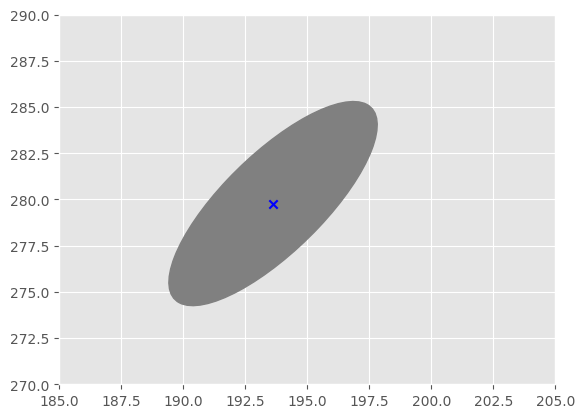

In [38]:
""" 使用Ellipse类绘制椭圆 """
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
plt.style.use('default')

# 创建一个椭圆， 参数分别为xy=中心坐标、长轴长度、短轴长度和旋转角度
ellipse = Ellipse(xy= centre, width= 2* max(lengths), height= 2* min(lengths), angle= angle, color='grey')


ax.add_artist(ellipse)

ax.set_xlim(185, 205)
ax.set_ylim(270, 290)

plt.scatter(centre[0], centre[1], color='blue', marker='x')

plt.grid(True)
plt.show()

***
#### Tests
Here we turn to the **CI for $a^T\mu$**, supported by **T-statistic**.
$$
t = \frac{\sqrt{n}(a^T\bar{x}-a^T\mu)}{\sqrt{a^T S a}} \sim t_{n-1}
$$

In [39]:
alpha = 0.05
quantile = stats.t.ppf(1-alpha/2, n-1)
quantile

2.015367569912941

For female samples' data we do the following Hypothesis Tests:
1. $H_0: \mu_1 = 190 \text{  vs  } H_1: \mu_1 \neq 190$
2. $H_0: \mu_2 = 275 \text{  vs  } H_1: \mu_2 \neq 275$

- for test one: $\alpha= (1,0)^T$
- for test two: $\alpha= (0,1)^T$

For $a = (1,0)^T$, if **t statistic** is out of $(t_{1-\alpha/2,n-1},t_{\alpha/2,n-1})$, then we reject the first $H_0$.<br>
For $a = (0,1)^T$, if **t statistic** is out of $(t_{1-\alpha/2,n-1},t_{\alpha/2,n-1})$, then we reject the second $H_0$.

##### test1:

In [40]:
mean_x = data.mean(axis=0)
S = np.cov(data.T)

In [41]:
a = np.array([1,0])
mu = np.array([190,275])
t_stat_1 = np.sqrt(n) * (a.T @ mean_x - a.T @ mu) / np.sqrt(a.T @ S @ a)

In [42]:
t_stat_1 > quantile

True

##### test2

In [43]:
a = np.array([0,1])
t_stat_2 = np.sqrt(n) * (a.T @ mean_x - a.T @ mu) / np.sqrt(a.T @ S @ a)

In [44]:
t_stat_2, t_stat_2 > quantile

(2.21940774736722, True)

As is shown above, the two tests are **rejected**, which means that the values of $\mu_1$ and $\mu_2$ are not plausible for female hook-billed kites.

***

### (b)
>  Construct the simultaneous 95% $T^2$-intervals for $\mu_1$ and $\mu_2$ and the 95% Bonferroni intervals for $\mu_1$ and $\mu_2$. <br>
> 
> Compare the two sets of intervals. What advantage,if any, do the $T^2$-intervals have over the Bonferroni intervals?

$(Answer).$

#### 95% $T^2$-intervals

$
a^T\bar{x}-c\sqrt{\frac{a^TSa}{n}} \leq
a^T\mu \leq
a^T\bar{x}+c\sqrt{\frac{a^TSa}{n}}
$

$c^2 = \frac{p(n-1)}{n-p} F_{p,n-p} (\alpha)$

In [45]:
alpha = 1 - 0.95

quantile = stats.f.ppf(1-alpha, p, n-p)

quantile

3.2144803278830416

In [46]:
c = np.sqrt(p*(n-1)/(n-p)*quantile)

##### $\mu_1$
We set $a = (1,0)^T$

In [47]:
a = np.array([1,0])

low = a.T @ mean_x - c * np.sqrt(a.T @ S @ a / n)
high = a.T @ mean_x + c * np.sqrt(a.T @ S @ a / n)

CI_mu1 = low, high
CI_mu1

(189.42172418403118, 197.8227202604133)

##### $\mu_2$

We set $a = (0,1)^T$

In [48]:
a = np.array([0,1])

low = a.T @ mean_x - c * np.sqrt(a.T @ S @ a / n)
high = a.T @ mean_x + c * np.sqrt(a.T @ S @ a / n)

CI_mu2 = low, high
CI_mu2

(274.25635067321497, 285.2992048823406)

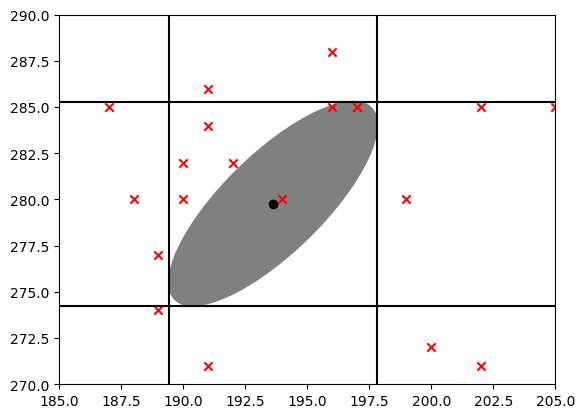

In [49]:
plt.style.use('default')

fig, ax = plt.subplots()
plt.style.use('default')

# 创建一个椭圆， 参数分别为xy=中心坐标、长轴长度、短轴长度和旋转角度
ellipse = Ellipse(xy= centre, width= 2* max(lengths), height= 2* min(lengths), angle= angle, color='grey')


ax.add_artist(ellipse)

ax.set_xlim(185, 205)
ax.set_ylim(270, 290)

plt.scatter(centre[0], centre[1], color='black', marker='o')

plt.grid(False)

plt.axvline(189.42172418403118, color = 'black', linestyle= '-')
plt.axvline(197.8227202604133, color = 'black', linestyle= '-')

plt.axhline(274.25635067321497, color = 'black', linestyle= '-')
plt.axhline(285.2992048823406, color = 'black', linestyle= '-')

plt.scatter(data[0], data[1], color = 'red', marker='x')
plt.show()

#### 95% Bonferroni intervals

##### $\mu_1$

In [50]:
alpha = 0.05

variation = stats.t.ppf(1-alpha/(2*p), n-1) * np.sqrt(S[0,0]/n)

print(mean_x[0] - variation, mean_x[0] + variation)

189.82155966089658 197.4228847835479


##### $\mu_2$

In [51]:
alpha = 0.05

variation = stats.t.ppf(1-alpha/(2*p), n-1) * np.sqrt(S[1,1]/n)

print(mean_x[1] - variation, mean_x[1] + variation)

274.7819222647878 284.77363329076775


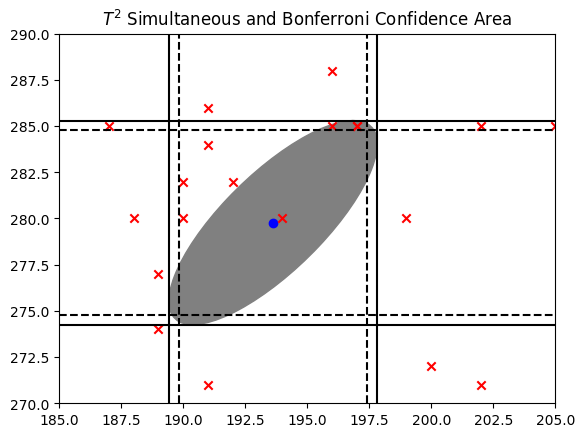

In [52]:
plt.style.use('default')

fig, ax = plt.subplots()
plt.style.use('default')

# 创建一个椭圆， 参数分别为xy=中心坐标、长轴长度、短轴长度和旋转角度
ellipse = Ellipse(xy= centre, width= 2* max(lengths), height= 2* min(lengths), angle= angle, color='grey')


ax.add_artist(ellipse)

ax.set_xlim(185, 205)
ax.set_ylim(270, 290)

plt.scatter(centre[0], centre[1], color='blue', marker='o')

plt.grid(False)

plt.axvline(189.42172418403118, color = 'black', linestyle= '-')
plt.axvline(197.8227202604133, color = 'black', linestyle= '-')
plt.axhline(274.25635067321497, color = 'black', linestyle= '-')
plt.axhline(285.2992048823406, color = 'black', linestyle= '-')


plt.axvline(189.82155966089658, color = 'black', linestyle= '--')
plt.axvline(197.4228847835479, color = 'black', linestyle= '--')
plt.axhline(274.7819222647878, color = 'black', linestyle= '--')
plt.axhline(284.77363329076775, color = 'black', linestyle= '--')

plt.scatter(data[0], data[1], color = 'red', marker='x')

plt.title('$T^2$ Simultaneous and Bonferroni Confidence Area')

plt.show()

## 5.31
>  Refer to the data on snow storms in **Exercise 3.20**.  
> - (a) Find a 95% confidence region for the mean vector **after taking an appropriate transformation**.  
> - (b) On the same scale,find the 95% Bonferroni confidence intervals for the two component means.

In [53]:
# Table 3.2
path = 'D:\A-多元统计分析\Wichern_data\Wichern_data\T3-2.DAT'
X = pd.read_csv(path, sep='\s+', header=None).T
X.T.head(), X.T.tail()

(      0     1
 0  12.5  13.7
 1  14.5  16.5
 2   8.0  17.4
 3   9.0  11.0
 4  19.5  23.6,
        0     1
 20  17.5  42.3
 21  10.5  17.5
 22  12.0  21.8
 23   6.0  10.4
 24  13.0  25.6)

In [54]:
X = np.array(X)

### (a)

We try **Poewr Transformation(幂变换)** to make the data more **normal**.

We just make the following transformation:
$$y_1 = \ln(x_1),y_2 = 1/\sqrt{x_2}$$

to make the data more normal.

In [55]:
Y = X
Y[0] = np.log(Y[0])
Y[1] = np.power(Y[1], -1/2)

In [56]:
Y_mean= Y.mean(axis = 1)
Y_mean

array([2.170685  , 0.23976578])

In [57]:
S = np.cov(Y)
S

array([[ 0.15130352, -0.00579152],
       [-0.00579152,  0.0018229 ]])

For the *mean vector* of data, we set it to be $\begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix}$.  
Here we want should find the confidence region for $\mu_1$ and $\mu_2$.

In [58]:
alpha = 1- 0.95
n,p = 25, 2

#### $\mu_1$

In [59]:
variation = np.sqrt( (n-1)*(p)/(n-p)*stats.f.ppf(1 - alpha , p, n-p)* S[0,0]/n )
variation

0.20790244903867014

In [60]:
Y_mean[0] - variation, Y_mean[0]+ variation

(1.9627825490612332, 2.3785874471385733)

#### $\mu_2$

In [61]:
variation = np.sqrt( (n-1)*(p)/(n-p)* stats.f.ppf(1 - alpha , p, n-p)* S[1,1]/n )
variation

0.02282003290486166

In [62]:
Y_mean[1] - variation, Y_mean[1]+ variation

(0.21694575074578049, 0.2625858165555038)

For $\mu_1$, the 95% confidence interval is (1.9627825490612332, 2.3785874471385733).<br>
For $\mu_2$, the 95% confidence interval is (0.21694575074578049, 0.2625858165555038).


### (b)

#### $\mu_1$

In [63]:
variation = stats.t.ppf(1- alpha/(2*p), n-1) * np.sqrt( S[0,0] / n)

In [64]:
variation

0.18600511299491737

In [65]:
Y_mean[0]- variation, Y_mean[0]+ variation

(1.9846798851049858, 2.3566901110948204)

#### $\mu_2$

In [66]:
variation = stats.t.ppf(1- alpha/(2*p), n-1) * np.sqrt( S[1,1] / n)

In [67]:
variation

0.02041651177580412

In [68]:
Y_mean[1]- variation, Y_mean[1]+ variation

(0.21934927187483802, 0.2601822954264463)

We get it.

## 6.7
>  Using the summary statistics for the electricity-demand data given in Example 6.4,compute and test the hypothesis $H_0: \mu_1 - \mu_2 =0$ assuming that $\Sigma_1 = \Sigma_2$. Set $\alpha = 0.05$.  
> Also,determine the linear combination of mean components most responsible for the rejection of $H_0$.

$(Solution).$

Hypothesis testing:<br>
$$H_0: \mu_1 - \mu_2 =0\space \space vs \space \space H_1:not\space H_0$$

$T^2= \begin{bmatrix}74.4 & 201.6 \end{bmatrix}
[(\frac{1}{45}+\frac{1}{55})
\begin{bmatrix}10963.7 & 21505.5\\ 21505.5 & 63661.3 \end{bmatrix}]^{-1}
\begin{bmatrix}
74.4 \\ 201.6 
\end{bmatrix} 
= 16.1$

$\frac{(n_1+n_2-2)p}{n_1+n_2-p-1}F_{p,n_1+n_2-p-1}(0.05)=6.26$

$16.1 > 6.26$, reject $H_0$ at the confidence level of $\alpha = 0.05$.


***

The linear combination is:  
$
\hat{a} = S^{-1}_{pooled}(\bar{x}_1-\bar{x}_2)=\begin{bmatrix} 0.0017 \\ 0.0026 \end{bmatrix}
$

## 6.11
> A likelihood argument provides additional support for pooling the two independent sample covariance matrices to estimate a common covariance matrix in the case of two normal populations. Give the likelihood function, $L(\mu_1, \mu_2, \Sigma)$, for two independent samples of sizes $n_1$ and $n_2$ from $N_p(\mu_1, \Sigma)$ and $N_p(\mu_2, \Sigma)$ populations, respectively. Show that this likelihood is maximized by the choices $\hat{\mu}_1 = \bar{x}_1 $, $\hat{\mu}_2 = \bar{x}_2$ and 
> $$ \hat{\Sigma}= \frac{1}{n_1+n_2}[(n_1-1)S_1+(n_2-1)S_2]= (\frac{n_1+n_2-2}{n_1+n_2})S_{pooled} $$
> *Hint*: Use(4-16) and the maximization Result 4.10

$L(\mu_1, \mu_2, \Sigma)= L(\mu_1,  \Sigma)L(\mu_2, \Sigma)$<br>


According to (4-16) and (4-17). The likelihood could be maximized through controlling that $\hat{\mu}_1=\bar{x}_1$ and $\hat{\mu}_2 = \bar{x}_2$ respectively, <br>
while we have:<br>
$\hat{\Sigma}= \frac{1}{n_1+n_2}[(n_1-1)S_1+(n_2-1)S_2]$<br>
$= (\frac{n_1+n_2-2}{n_1+n_2})S_{pooled}$

## 6.12
> *(Test for linear profiles, given that the profiles are parallel.)*  
> 
> Let $\mu_1^T=[\mu_{11},...,\mu_{1p}]$ and $\mu_2^T=[\mu_{21},...,\mu_{2p}]$ be the mean responses to $p$ treatments for populations 1 and 2, respectively. 
> 
> Assume that the profiles given by the two mean vectors are parallel.

### (a).

Note that <br>
$C(\mu_1+\mu_2)_{(ith \space row)}=(\mu_{1,i}+\mu_{2,i})-2(\mu_{1,i+1}+\mu_{2,i+1})+(\mu_{1,i+2}+\mu_{2,i+2}) = 0$

That is to say:<br><br>
$The\space formula \space means \space that $<br>
$(\mu_{1,i}+\mu_{2,i})-(\mu_{1,i+1}+\mu_{2,i+1}) =(\mu_{1,i+1}+\mu_{2,i+1})-(\mu_{1,i+2}+\mu_{2,i+2})$<br><br>
for arbirary $i = 3,4,...,p$ .<br>

### (b)

It's not difficult to get that:<br>
$(X-\mu)^T\Sigma^{-1}(X - \mu) = (x-\mu)^T\Sigma_{p}^{i=1}\frac{1}{\lambda_i}(e_i^T(x-\mu))^{2}$<br><br>
$(X_1 -\mu_1 - \Sigma_{12}\Sigma_{22}^{-1}(X_2-\mu_2))^T(\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21})^{-1}(......)$<br>

$=(......)^T(\Sigma_{i=1}^{q}\frac{1}{\lambda _i} e_ie_i^T - \Sigma_{12}(\Sigma^{p}_{j=q+1}\frac{1}{\lambda_j}{e_j e_j^T})\Sigma_{21})(......)$<br>

$
= \Sigma^{q}_{i=1}\frac{1}{\lambda_i}( e_i^T(x_1-\mu_1) )-\Sigma^{p}_{j=q+1} \frac{1}{\lambda_j}(e_j^T (X_2 - \mu_2))$<br>

That's for the oryhology of $e_i(i=1...q)$ and $e_j(j=q+1...p)$, we can get that:<br>
$$(X_2-\mu_2)^T\Sigma_{22}^{-1}(x_2-\mu_2)=......$$

## 6.17
>  The data in Table 6.8 were collected to test two psychological models of numerical cognition. Does the processing of numbers depend on the way the numbers are presented (words, Arabic digits)? Thirty-two subjects were required to make a series of  quick numerical judgments about two numbers presented as either two number words (“two,” “four”) or two single Arabic digits (“2,” “4”). The subjects were asked to respond “same” if the two numbers had the same numerical parity (both even or both odd) and “different” if the two numbers had a different parity (one even, one odd). Half of the subjects were assigned a block of Arabic digit trials, followed by a block of number word trials, and half of the subjects received the blocks of trials in the reverse order. Within each block, the order of “same” and “different” parity trials was randomized for each subject. For each of the four combinations of parity and format, the median reaction times for correct responses were recorded for each subject. Here
> - $X_1$ = median reaction time for word format–different parity combination
> - $X_2$ = median reaction time for word format–same parity combination
> - $X_3$ = median reaction time for Arabic format–different parity combination
> - $X_4$ = median reaction time for Arabic format–same parity combination
***
***
$$\text{Table 6.8 would be Shown Below.}$$
***
***
$\text{Quentions.}$
> - (a) Test for treatment effects using a repeated measures design. Set $\alpha$ = 0.05.  
> 
> - (b) Construct 95% (simultaneous) confidence intervals for the contrasts representing the number format effect, the parity type effect and the interaction effect. Interpret the resulting intervals.  
> 
> - (c) The absence of interaction supports the $M$ model of numerical cognition, while the presence of interaction supports the $C$ and $C$ model of numerical cognition. Which model is supported in this experiment?  
> 
> - (d) For each subject, construct three difference scores corresponding to the number format contrast, the parity type contrast, and the interaction contrast. Is a multivariate normal distribution a reasonable population model for these data? Explain.

$\text{Answer.}$
 

First, we need to load the data and perform some basic data manipulation.

In [69]:
import pandas as pd
import numpy as np

In [70]:
path= 'D:/A-多元统计分析/Wichern_data/Wichern_data/T6-8.dat'
X = pd.read_csv(path, sep= '\s+', header = None)

In [71]:
X

,0,1,2,3
0,869.0,860.5,691.0,601.0
1,995.0,875.0,678.0,659.0
2,1056.0,930.5,833.0,826.0
3,1126.0,954.0,888.0,728.0
4,1044.0,909.0,865.0,839.0
5,925.0,856.5,1059.5,797.0
6,1172.5,896.5,926.0,766.0
7,1408.5,1311.0,854.0,986.0
8,1028.0,887.0,915.0,735.0
9,1011.0,863.0,761.0,657.0


The columns represent respectively $x_1,x_2,x_3,x_4$

### (a)
> Test for treatment effects using a repeated measures design. Set $\alpha$ = 0.05.

Hypothesis Testing:
$$H_0:\mu_1=\mu_2=\mu_3=\mu_4 \quad vs \quad H_1: not\space H_1 $$

That's equivalent to test:
$$\mu_1-\mu_2 = 0 \quad \mu_2-\mu_3 = 0\quad \mu_3-\mu_4 = 0$$

Accordingly we set $C$:
$$
\begin{pmatrix}
1&-1&0&0\\
0&1&-1&0\\
0&0&1&-1
\end{pmatrix}
$$  
to satisfy the null hypothesis.

In [72]:
C = np.array([[1,-1,0,0], 
              [0,1,-1,0], 
              [0,0,1,-1]])
Y = C @ X.T

In [73]:
X_mean = X.T.mean(axis=1)

In [74]:
X_mean

0    967.562500
1    875.609375
2    825.312500
3    710.937500
dtype: float64

We could construct the $T^2_0=n(C\bar{X}-C\mu)^T(CSC^T)^{-1}(C\bar{X}-\mu)$

In [75]:
S = np.cov(X.T)
S

array([[36178.35080645, 25936.72681452, 18447.56854839, 15909.23790323],
       [25936.72681452, 22597.75378024, 14261.73084677, 14115.93447581],
       [18447.56854839, 14261.73084677, 18487.81854839, 11799.72983871],
       [15909.23790323, 14115.93447581, 11799.72983871, 13001.39919355]])

In [76]:
n = 32

T_square_0 = n*(C@ X_mean - 0 ).T @ np.linalg.inv(C@ S @ C.T)@ ((C@ X_mean - 0 ))
T_square_0

153.72750564150135

In [77]:
p = 4
alpha = 0.05

from scipy import stats
T_square_quantile = ((n-1)*(p-1)/(n-p+1))* stats.f.ppf(1-alpha, p-1, n-p+1)
T_square_quantile

9.409130335819585

In [78]:
T_square_0 > T_square_quantile

True

For $T^2_0 > T^2(\alpha)$, we reject the null hypothesis.  
So the treatment effects are not the same.

***
$\text{Repeated Measures Design应该只能用于检验整体的不等关系吧。}$
***

### (b)
> Construct 95% (simultaneous) confidence intervals for the contrasts **representing the number format effect**, **the parity type effect** and **the interaction effect**. Interpret the resulting intervals.

$\text{number format effext} = \mu_1+\mu_3-\mu_2-\mu_4$<br>
$\text{parity type effect} = \mu_3+\mu_4-\mu_1-\mu_2$<br>
$\text{interaction effect}= \mu_1 +\mu_4 - \mu_2 - \mu_3$

We should let our contrast be $C = \begin{pmatrix}1&-1&1&-1\\-1&-1&1&1\\1&-1&1&-1 \end{pmatrix}$

In [79]:
C = np.array([[1,-1,1,-1],
             [-1,-1,1,1],
             [1,-1,-1,1]])

In [80]:
X_mean

0    967.562500
1    875.609375
2    825.312500
3    710.937500
dtype: float64

#### 1

In [81]:
c = np.array([1,-1,1,-1])
variation = np.sqrt((n-1)*(p-1)/(n-p+1)*stats.f.ppf(0.95,p-1,n-p+1))* np.sqrt(c.T @ S @c * (1/n))
c.T@X_mean - variation , c.T@X_mean + variation

(130.45672102672552, 282.1995289732745)

#### 2

In [82]:
c = np.array([-1,-1,1,1])
variation = np.sqrt((n-1)*(p-1)/(n-p+1)*stats.f.ppf(0.95,p-1,n-p+1))* np.sqrt(c.T @ S @c * (1/n))
c.T@X_mean - variation , c.T@X_mean + variation

(-415.7363699235406, -198.10738007645938)

#### 3

In [83]:
c = np.array([1,-1,-1,1])
variation = np.sqrt((n-1)*(p-1)/(n-p+1)*stats.f.ppf(0.95,p-1,n-p+1))* np.sqrt(c.T @ S @c * (1/n))
c.T @X_mean - variation , c.T @X_mean + variation

(-76.66679723725176, 31.823047237251764)

Above is the three $95\%$ confidence intervals.

***
$\text{这里由于C是p-1维的，所以自由度应该是3而不是4}$
***

No interaction effect. <br>
Party effect-"different" resonses slower than "same" responses.<br>
Format effect-"words" slower than "Arabic".

### (c)
> The absence of interaction supports the $M$ model of numerical cognition, while the presence of interaction supports the $C$ model of numerical cognition. Which model is supported in this experiment?  

The M model of numerical cognition is a reasonable population model for the scores.

#### (d)
> For each subject, construct three difference scores corresponding to the number format contrast, the parity type contrast, and the interaction contrast. Is a multivariate normal distribution a reasonable population model for these data? Explain.

According to our discussion above, the three scores make sense.

In [84]:
X

,0,1,2,3
0,869.0,860.5,691.0,601.0
1,995.0,875.0,678.0,659.0
2,1056.0,930.5,833.0,826.0
3,1126.0,954.0,888.0,728.0
4,1044.0,909.0,865.0,839.0
5,925.0,856.5,1059.5,797.0
6,1172.5,896.5,926.0,766.0
7,1408.5,1311.0,854.0,986.0
8,1028.0,887.0,915.0,735.0
9,1011.0,863.0,761.0,657.0


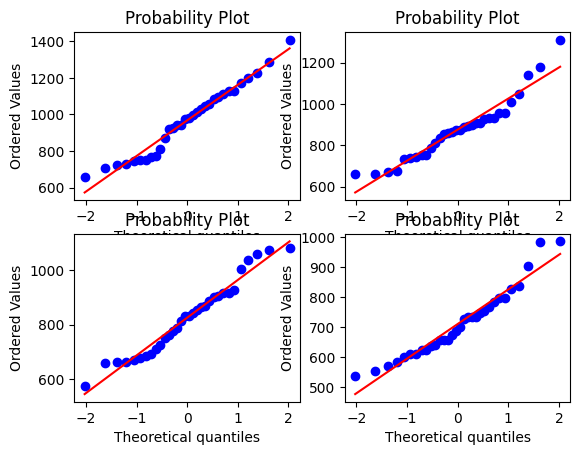

In [85]:
X = np.array(X)

import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    stats.probplot(X.T[i], plot = plt)

The multivariate normal distribution is a reasonable population model for these data.

## 6.21
>  Using Moody’s bond ratings, samples of 20 Aa (middle-high quality) corporate bonds and 20 Baa (top-medium quality) corporate bonds were selected. For each of the corresponding companies, the ratios
> - $X_1$ = current ratio (a measure of short-term liquidity)
> - $X_2$ = long-term interest rate (a measure of interest coverage)
> - $X_3$ = debt-to-equity ratio (a measure of financial risk or leverage)
> - $X_4$ = rate of return on equity (a measure of profitability)
 ***
$题干太长了就不写了吧...$
 ***
 

### (a)
> Does pooling appear reasonable here? Comment on the pooling procedure in this
 case.

In [86]:
#S1
'''
0.459 0.254 -0.026 -0.244
0.254 27.465 -0.589 -0.267 
-0.026 -0.589 0.030 0.102 
-0.244 -0.267 0.102 6.854
'''

'\n0.459 0.254 -0.026 -0.244\n0.254 27.465 -0.589 -0.267 \n-0.026 -0.589 0.030 0.102 \n-0.244 -0.267 0.102 6.854\n'

In [87]:
S1= np.array([[0.459, 0.254, -0.026, -0.244],
              [0.254, 27.465, -0.589, -0.267],
              [-0.026, -0.589, 0.030, 0.102],
              [-0.244, -0.267, 0.102, 6.854]])

In [88]:
#S2
'''
 0.944, -0.089,  0.002, -0.719
 -0.089, 16.432, -0.400, 19.044
 0.002, -0.400, 0.024, -0.094
 -0.719, 19.044, -0.094, 61.854
'''

'\n 0.944, -0.089,  0.002, -0.719\n -0.089, 16.432, -0.400, 19.044\n 0.002, -0.400, 0.024, -0.094\n -0.719, 19.044, -0.094, 61.854\n'

In [89]:
S2 = np.array([[0.944, -0.089,  0.002, -0.719], 
               [-0.089, 16.432, -0.400, 19.044], 
               [0.002, -0.400, 0.024, -0.094], 
               [-0.719, 19.044, -0.094, 61.854]])

In [90]:
S_pooled = ( (4-1)* S1 + (4-1)* S2 )/ (4+4-2)
S_pooled

array([[ 7.01500e-01,  8.25000e-02, -1.20000e-02, -4.81500e-01],
       [ 8.25000e-02,  2.19485e+01, -4.94500e-01,  9.38850e+00],
       [-1.20000e-02, -4.94500e-01,  2.70000e-02,  4.00000e-03],
       [-4.81500e-01,  9.38850e+00,  4.00000e-03,  3.43540e+01]])

Basically, that's indeed $S_{pooled}$.

### (b)
> Are the financial characteristics of firms with Aa bonds different from those with Baa bonds? Using the pooled covariance matrix, test for the equality of mean vectors. Set $\alpha$ = 0.05.

Hypothesis Testing:
$$
H_0: \mu_1 = \mu_2 \quad vs \quad H_1:\text{not } H_0
$$

We consider $T^2 = (\bar{X}_1-\bar{X}_2 - (\mu_1-\mu_2)^T[(\frac{1}{n_1}+\frac{1}{n_2})]S_{pooled}]^{-1}(\bar{X}_1-\bar{X}_2 - (\mu_1-\mu_2) $

In [91]:
bar_X1 = np.array([2.287, 12.600, 0.347, 14.830])
bar_X2 = np.array([2.404, 7.155, 0.524, 12.840])

In [92]:
diff = bar_X1 - bar_X2

In [93]:
diff.T @ np.linalg.inv( ((1/20+1/20)*  S_pooled) ) @ diff

15.829959574001874

In [94]:
from scipy import stats
38/ 35 *stats.f.ppf(1-0.05, 4, 20 + 20 - 4 -1)

2.8678764877967287

$T^2 > \frac{(n_1+n_2 -2)}{(n_1+m_2-p-1})F_{p, n_1+n_2-p-1}(0.95)$

We reject the null Hypothesis. So they're different.

### (c)
>  Calculate the linear combinations of mean components most responsible for rejecting $H_0:\mu_1-\mu_2=0$ in Part b.

In [95]:
np.linalg.inv(S_pooled) @ diff

array([-0.2417617 ,  0.16009566, -3.73254518,  0.01122035])

The linear combination is:  
$
\hat{a} = S^{-1}_{pooled}(\bar{x}_1-\bar{x}_2)=\begin{bmatrix} -0.2417617 \\ 0.16009566 \\ -3.73254518 \\ 0.01122035 \end{bmatrix}
$

### (d)
> Bond rating companies are interested in a company’s ability to satisfy its outstanding debt obligations as they mature. Does it appear as if **one or more of the foregoing financial ratios might be useful in helping to classify a bond as “high” or “medium” quality**? Explain.<br>

$\text(Answer).$


$\text{注：就是看} \hat{a}_i\sqrt{S_{pooled,ii}}，选出绝对值最大的。$

Note that the $X_2:\text{ long term interest rate} \space$ has the largest coefficient and might be able to classify a bond as "high" or "medium" quality.

In [96]:
for i in range(4):
    result = diff[i] * np.sqrt(S_pooled[i,i])
    print(result)

-0.09799404828865882
25.509403691825096
-0.02908406780352433
11.663844794920758


### (e)
>  Repeat part (b) assuming normal populations with unequal covariance matices (see (6-27), (6-28) and (6-29)). Does your conclusion change?

$\text{(Solution).}$

We have the *Hypothesis Testing*：
$$
H_0: \mu_1 = \mu_2 \quad vs \quad H_1:\text{not } H_0
$$


 ***
 $\text{(6-27)} \quad \quad \dots\space\dots\space\dots$<br><br>
 $\text{(6-28)}  \quad \quad T^2 = \frac{vp}{v-p+1}F_{p,v-p+1}
$<br><br>
 $\text{(6-29)} \quad \quad \dots\space\dots\space\dots $
 ***


Basically we have $p=4$ and $v = \frac{4+16}{0.53556}$ and according to *(b)*,  $T^2=15.830$.<br><br>

Then at 95% confidence level, the critical value is:<br><br>
$
\quad \frac{vp}{v-p_1}F_{p, v-p+1}(0.95)
$
<br><br>
$
= \frac{4 \times 37.344}{37.344-4+1}F_{4,37.344-4+1}(0.95)
$
<br><br>
$
= \frac{149.376}{34.344}(2.647) = 11.513
$

For $T^2= 15.830>11.513$, we reject the null hypothesis. So the conclusion is the same.